# MOVIE GENRE CLASSIFICATION

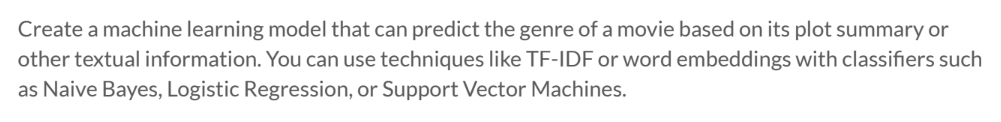

**IMPORT LIBRARIES**

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('always')

**LOADING DATASET**

In [2]:
test_data = pd.read_csv('test_data.txt', sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data = pd.read_csv('train_data.txt', sep=':::', names=['Title', 'Genre', 'Description'],engine='python')

**EXPLORATORY DATA ANALYSIS**

In [3]:
train_data.shape

(54214, 3)

In [4]:
test_data.shape

(54200, 3)

In [5]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [7]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [8]:
train_data.isnull()

,Title,Genre,Description
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
54210,False,False,False
54211,False,False,False
54212,False,False,False
54213,False,False,False


In [9]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [10]:
train_data.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

**VISUALIZATION**

Text(0, 0.5, 'Distribution of Genres')

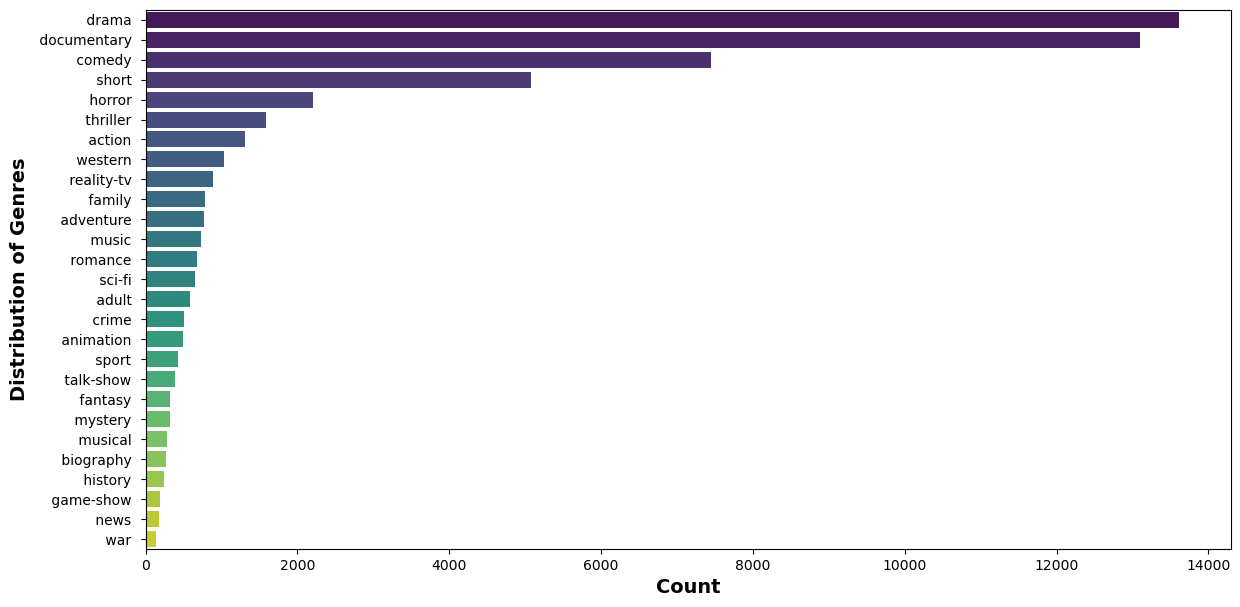

In [11]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Distribution of Genres', fontsize=14, fontweight='bold')

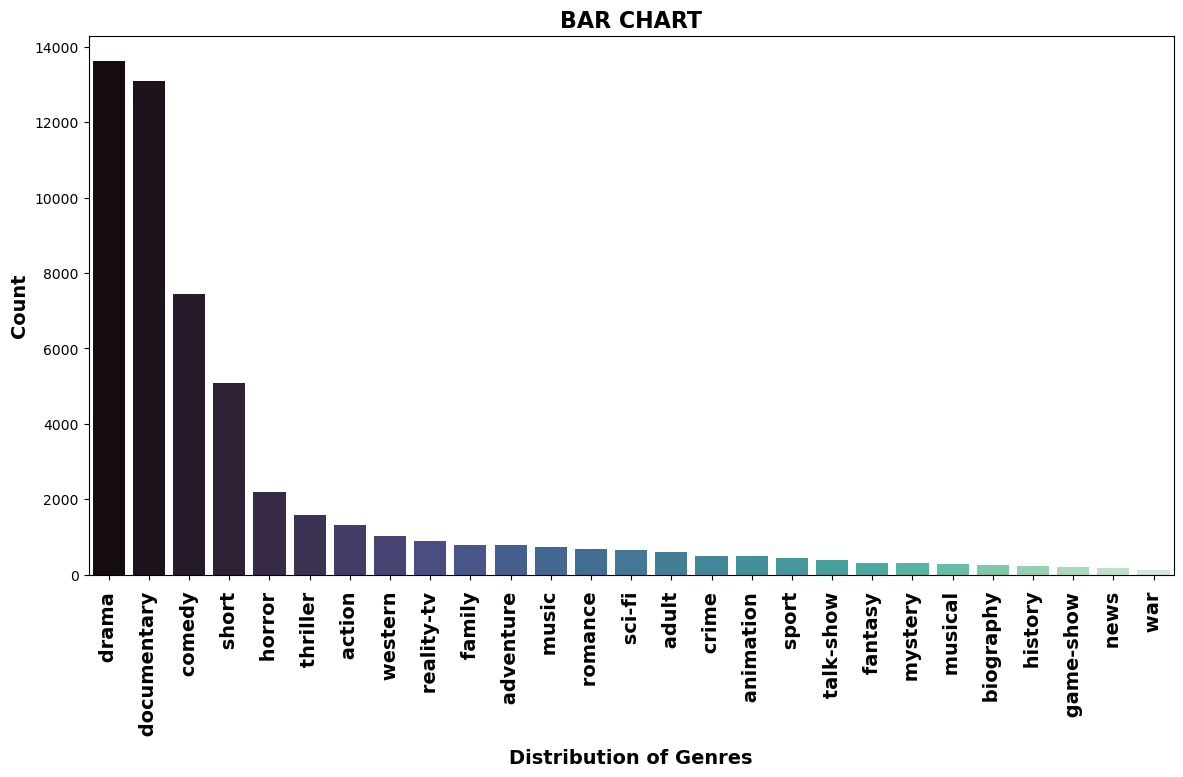

In [12]:
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='mako')
plt.xlabel('Distribution of Genres', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('BAR CHART', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

**STEMMING AND VECTORIZER**

In [13]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    #text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

In [14]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
x_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

**MODEL BUILDING**

**SPLITTING THE DATA**

In [15]:
X = x_train
y = train_data['Genre']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**NAIVE BAYES**

In [16]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

naive= MultinomialNB()
naive.fit(x_train, y_train)

MultinomialNB()

In [17]:
naive_predict = naive.predict(x_test)
naive_predict

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' documentary ',
       ' drama '], dtype='<U13')

In [18]:
from sklearn import metrics 

print("Model accuracy :{0:.4f}".format(metrics.accuracy_score(y_test,naive_predict)))

Model accuracy :0.4453


**LOGISTIC REGRESSION**

In [19]:
from sklearn import metrics 

from sklearn.linear_model import LogisticRegression

# Fit the model on train
lr= LogisticRegression(multi_class='multinomial', solver='sag')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [20]:
lr_predict = lr.predict(x_test)
lr_predict

array([' comedy ', ' drama ', ' documentary ', ..., ' drama ', ' short ',
       ' horror '], dtype=object)

In [21]:
from sklearn import metrics 

print("Model accuracy :{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict)))

Model accuracy :0.5795
